# Image Processing with opencv
I read image and video processing during my college days (<10 years ago). I got a chance to revise the book contents. I'm capturing here some of my experiments with openCV in Python.

## 1. Histogram equalization
Histogram equalization helps to enhance the picture especially when the picture is too dark or too bright

In [1]:
#my experiments on histogram equalizatoin. 
#source code is re-used from http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline
print('loaded opencv version:', cv2.__version__)
image_path = 'D:/samples/data_science/image_processing/before_histogram_equalization.jpg'

loaded opencv version: 3.2.0


### 1.1 some utility functions
below functions are for convenience, of course they are not most efficient but avoids repeated code

In [2]:
def showImageHistogram(image, title):
    "plots the histogram of the image"
    val_range = [0, 256]
    hist,bins= np.histogram(image.flatten(), 255, val_range)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(image.flatten(), 256, val_range, color = 'r')
    plt.xlim(val_range)
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title(title)
    plt.show()

    return

def showImageMatPlt(image, title, gray=True):
    "shows the image using Matplotlib"
    
    if(gray==True):
        plt.gray() #matplotlib assumes passed image as color, hence setting it to be gray
        
    plt.title(title)
    plt.imshow(image)
    plt.show()
    return
    


### 1.2 Loading and displaying the original image
Let us load and display the image and it's pixel distribution

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


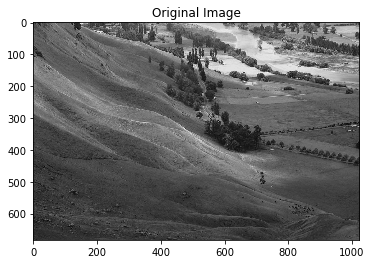

In [3]:
#let us load the image and show its original form and histogram
#read image
img = cv2.imread(image_path, 0)

assert(img != None)

#display the original image and it's original histogram
showImageMatPlt(img, 'Original Image')


as you can see the above picture, it is bit too dark. Let us see the histogram below

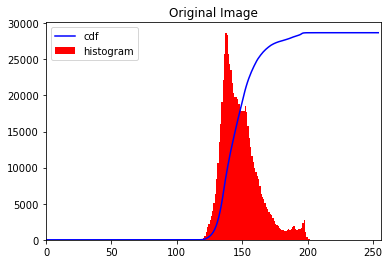

In [4]:

showImageHistogram(img, 'Original Image')


As you can see above, most of the pixel values are in between ~120 and 180 values. We wanted to stretch the pixel values to be nearly uniform

### 1.3 Performing histogram equalizatoin using opencv
see below call for histogram equalization and normalizeed image. You may observe that the trees can be seen better in below picture

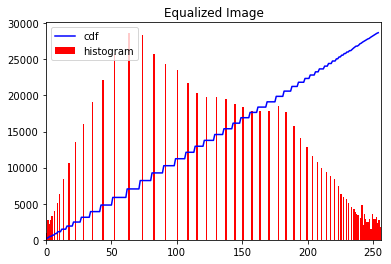

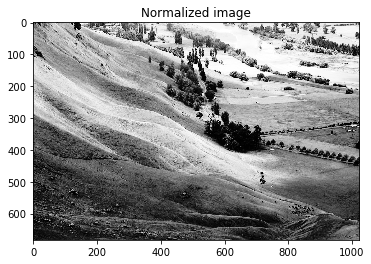

In [5]:
equ = cv2.equalizeHist(img)
# let us see the histogram now
showImageHistogram(equ, 'Equalized Image')
showImageMatPlt(equ, 'Normalized image')

## 2. Median filter
below example shows how to remove salt and pepper noise

image resolution:(512, 512)


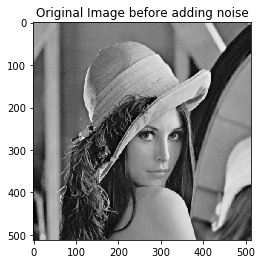

In [27]:
#let us first read the iamge
img = cv2.imread('D:/samples/data_science/image_processing/Lenna.png', cv2.IMREAD_GRAYSCALE)
print('image resolution:' + str(img.shape))
showImageMatPlt(img, 'Original Image before adding noise')

### 2.1 Adding noise to the image
Let us add the noise by ourselves using random numbers. Remember salt noize means making some pixels appear unusually brighter and pepper noise means making some pixels appear unusually darker

In [28]:
#let us generate a matrix of random values between 0 to 255. matrix size is same as image size
saltpepper_noise = np.random.random_sample(img.shape) * 255 
print('max:' + str(np.max(saltpepper_noise)) +', min:'+str(np.min(saltpepper_noise)))

#let us add a salt noise whereever the random value is above 250
#salt contains the index where random value is above 250
salt = saltpepper_noise > 250

#let us add pepper noise where the random value is below 10
#pepper contains the indexes where random value is below 10
pepper = saltpepper_noise < 10

max:254.997669867, min:0.00255018425387


In [30]:
#now let us change the values of pixels
img[salt] = saltpepper_noise[salt]
img[pepper] = saltpepper_noise[pepper]

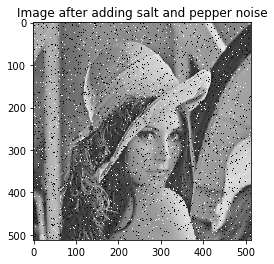

In [31]:
#display image after noise
showImageMatPlt(img, 'Image after adding salt and pepper noise')

### 2.2 Removing salt and pepper noise using median blur

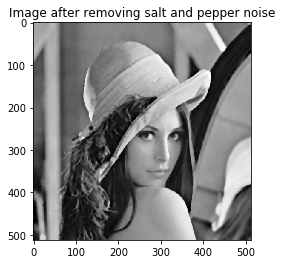

In [34]:
median = cv2.medianBlur(img,5)
showImageMatPlt(median, 'Image after removing salt and pepper noise')

## 3. Removing noise using non local means filter
non local means algorithm works if noise can be removed by averaging similar blocks in an image 

image dimensions:(518, 774, 3)


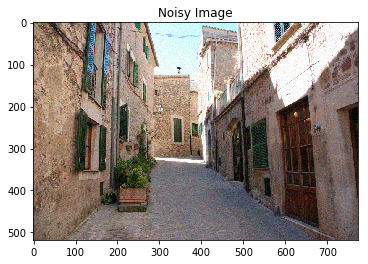

In [43]:
img = cv2.imread('D:/samples/data_science/image_processing/buildings_noisy.png', cv2.IMREAD_ANYCOLOR)
print('image dimensions:'+str(img.shape))
#opencv reads in RGB format, let us convert to BGR format
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
showImageMatPlt(img, 'Noisy Image', False )

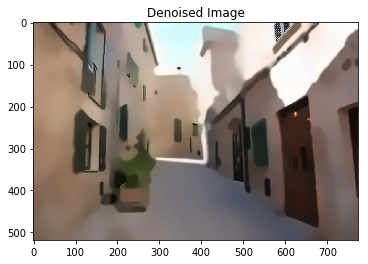

In [51]:
# fastNlMeansDenoisingColored(source, dst,
#h_luminance, <- filter strength, higher will remove more noise but also image details
#photo_render, <- same as h_Lunincance for colors
#search_window, <- window size to be searched for similar pixels. Greater the value, better noise reduction but degrades performance
#block_size , <- size of the pixel template

img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
showImageMatPlt(img, 'Denoised Image', False )

## 3. Edge Detection

## Canny Edge Detection
this requires first de noising and then applying edge detection. Let us see how that goes!

original image dimensions: (270, 471, 3)


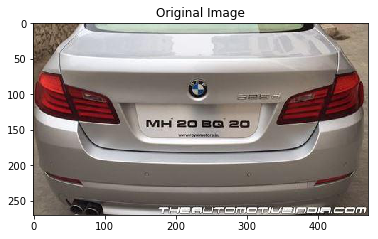

In [82]:
#loading the image
img = cv2.imread('D:\samples\data_science\image_processing\car_with_number_plate.jpg', cv2.IMREAD_ANYCOLOR)
print('original image dimensions: ' + str(img.shape))

#let us convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showImageMatPlt(img, 'Original Image', False)


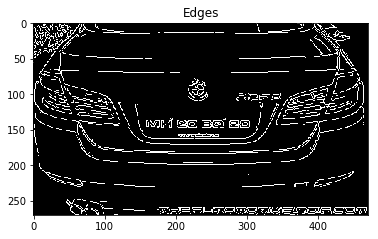

In [86]:
#larger the values (100, 200) few are the detected edges
#lower the values, more the edges - too many.
edges = cv2.Canny(img,100,200)
showImageMatPlt(edges, 'Edges', False)